In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv")

In [3]:
df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0,NaN
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0,NaN
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0,NaN
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0,NaN
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0,NaN


In [4]:
df.shape

(410, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 410 non-null    object 
 1   date                     410 non-null    object 
 2   vaccine                  410 non-null    object 
 3   source_url               410 non-null    object 
 4   total_vaccinations       410 non-null    int64  
 5   people_vaccinated        410 non-null    int64  
 6   people_fully_vaccinated  410 non-null    int64  
 7   total_boosters           57 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 25.8+ KB


In [6]:
df.isnull().sum()

location                     0
date                         0
vaccine                      0
source_url                   0
total_vaccinations           0
people_vaccinated            0
people_fully_vaccinated      0
total_boosters             353
dtype: int64

In [7]:
df.dtypes

location                    object
date                        object
vaccine                     object
source_url                  object
total_vaccinations           int64
people_vaccinated            int64
people_fully_vaccinated      int64
total_boosters             float64
dtype: object

In [8]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,4.100000e+02,4.100000e+02,4.100000e+02,5.700000e+01
mean,7.091653e+08,4.592037e+08,2.479797e+08,1.410314e+07
std,6.039934e+08,3.451348e+08,2.653990e+08,5.166469e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,3.294338e+06
25%,1.537726e+08,1.264228e+08,2.734986e+07,1.007174e+07
50%,5.643736e+08,4.394073e+08,1.249663e+08,1.592045e+07
75%,1.227168e+09,7.859285e+08,4.412392e+08,1.860569e+07
max,1.798217e+09,9.684542e+08,8.098619e+08,1.990147e+07


In [9]:
df = df.replace(np.nan,0)
df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0,0.0
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0,0.0
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0,0.0
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0,0.0
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0,0.0


In [10]:
df['total_boosters'].dtypes

dtype('float64')

In [11]:
pf = df['total_boosters']
df['total_boosters'] = df['total_boosters'].astype(int)
df.dtypes

location                   object
date                       object
vaccine                    object
source_url                 object
total_vaccinations          int64
people_vaccinated           int64
people_fully_vaccinated     int64
total_boosters              int32
dtype: object

<AxesSubplot:xlabel='date', ylabel='people_vaccinated'>

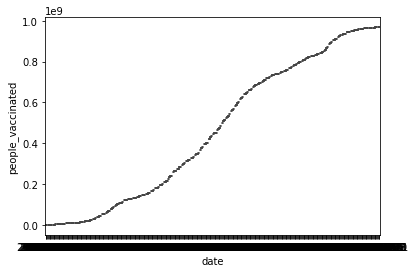

In [12]:
sns.boxplot(x="date",y="people_vaccinated",data=df)

In [13]:
l = len(df['people_vaccinated'])
l

410

In [14]:
equispacedArray = []
for i in range(1, l+1):
    equispacedArray.append(i)
    
print(equispacedArray)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [15]:
from statistics import mean

In [16]:
xs = np.array(equispacedArray, dtype=np.float64)
ys = np.array(df['people_vaccinated'], dtype=np.float64)


In [17]:
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)

2880090.086036931


In [18]:
X=df.drop(["location","date","vaccine","source_url"],axis=1)
y=df["total_vaccinations"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

D:\Users\Anubha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predictions=model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.0

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
      191181       0.00      0.00      0.00       0.0
      454049       0.00      0.00      0.00       1.0
      806484       0.00      0.00      0.00       1.0
     1390592       0.00      0.00      0.00       1.0
     1615504       0.00      0.00      0.00       1.0
     3744334       0.00      0.00      0.00       1.0
     3758843       0.00      0.00      0.00       1.0
     3950156       0.00      0.00      0.00       1.0
     4138918       0.00      0.00      0.00       1.0
     4449552       0.00      0.00      0.00       1.0
     5775322       0.00      0.00      0.00       1.0
     6259008       0.00      0.00      0.00       1.0
     6611561       0.00      0.00      0.00       1.0
     8516771       0.00      0.00      0.00       1.0
     8857341       0.00      0.00      0.00       1.0
     9846523       0.00      0.00      0.00       1.0
    12366633       0.00    

D:\Users\Anubha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Anubha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Anubha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Anubha\anaconda3\lib\site-packages\sklearn\metrics\

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<AxesSubplot:>

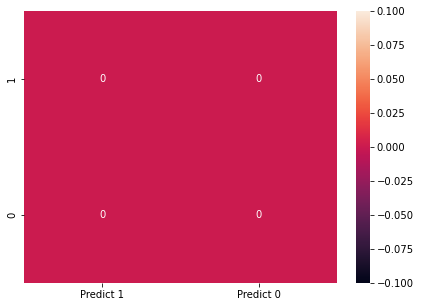

In [25]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1,0])

df_cm = pd.DataFrame(cm,index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [26]:
from sklearn import svm

In [27]:
sf = svm.SVC(gamma=0.49, C=7)

In [28]:
sf.fit(X_train , y_train)

SVC(C=7, gamma=0.49)

In [29]:
y_pred = sf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test ,y_pred)

0.0